## Observations and Insights 

In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
totalData = mouse_metadata.merge(study_results)
# Display the data table for preview
totalData.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [52]:
# Checking the number of mice.
miceCount = len(totalData['Mouse ID'].unique())
miceCount

249

In [53]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
miceTable = totalData.groupby('Mouse ID').count()
miceTable = miceTable.sort_values(by='Timepoint', ascending=False)
miceTable.head()


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,13,13,13,13,13,13,13
a203,10,10,10,10,10,10,10
n364,10,10,10,10,10,10,10
m546,10,10,10,10,10,10,10
m550,10,10,10,10,10,10,10


In [54]:
# Optional: Get all the data for the duplicate mouse ID. 



In [55]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
totalDataClean = totalData.drop_duplicates()
totalDataClean.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [56]:
# Checking the number of mice in the clean DataFrame.
miceCount2 = len(totalData['Mouse ID'].unique())
miceCount2


249

## Summary Statistics

In [57]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean = totalDataClean.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = totalDataClean.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = totalDataClean.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standardDev = totalDataClean.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = totalDataClean.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# This method is the most straighforward, creating multiple series and putting them all together at the end.
analysisData = pd.DataFrame({'Mean': mean, 'Median': median, 'Variance': variance, 'Standard_Deviation': standardDev, 'SEM': sem})
analysisData


,Mean,Median,Variance,Standard_Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [58]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice')

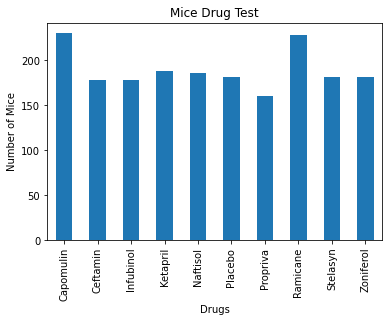

In [59]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
barPandas = totalDataClean.groupby(['Drug Regimen']).count()['Mouse ID']
barPandas.plot(kind='bar')
plt.title('Mice Drug Test')
plt.xlabel('Drugs')
plt.ylabel('Number of Mice')


Text(0, 0.5, 'Number of Mice')

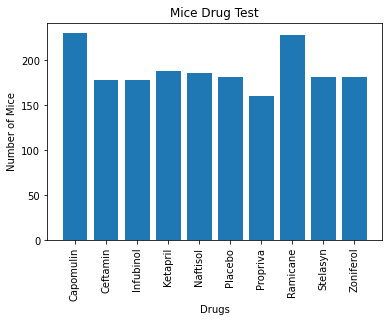

In [63]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
marks = analysisData.index
xAxis = np.arange(len(marks))
yAxis = totalDataClean.groupby('Drug Regimen')['Mouse ID'].count()

plt.bar(xAxis, yAxis, align='center')
plt.xticks(xAxis, marks, rotation='vertical')
plt.title('Mice Drug Test')
plt.xlabel('Drugs')
plt.ylabel('Number of Mice')


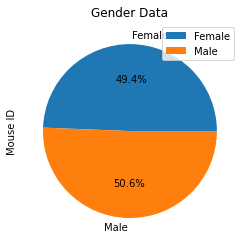

In [69]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
genderData = totalDataClean.groupby('Sex').count().reset_index()
genderData = genderData[['Sex', 'Mouse ID']]
genderPie = genderData.plot(kind='pie', y='Mouse ID', labels=genderData["Sex"], autopct='%1.1f%%', title = "Gender Data")


Text(0.5, 1.0, 'Gender Data')

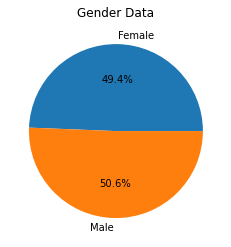

In [70]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(genderData['Mouse ID'], labels=['Female','Male'], autopct='%1.1f%%')
plt.title('Gender Data')


## Quartiles, Outliers and Boxplots

In [76]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
totalDataClean2 = totalDataClean[totalDataClean["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
# Start by getting the last (greatest) timepoint for each mouse
totalDataClean2 = totalDataClean2.loc[totalDataClean2['Timepoint'] == 45]
totalDataClean2 = totalDataClean2[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
totalDataClean2
    

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
9,Ramicane,k403,45,22.050126
19,Capomulin,s185,45,23.343598
29,Capomulin,x401,45,28.484033
39,Capomulin,m601,45,28.430964
49,Ramicane,g791,45,29.128472
...,...,...,...,...
1797,Ceftamin,x822,45,61.386660
1813,Infubinol,y163,45,67.685569
1845,Ceftamin,y769,45,68.594745
1855,Ceftamin,y865,45,64.729837


ValueError: Dimensions of labels and X must be compatible

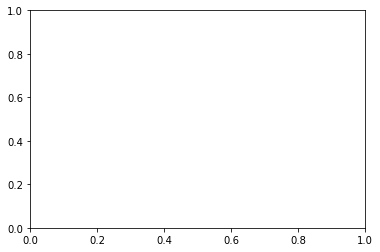

In [83]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxPlotData = totalDataClean2.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
boxPlotData = boxPlotData.to_frame()


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume')

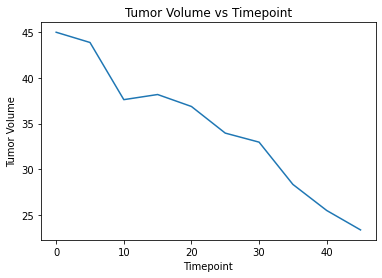

In [87]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
tumorTime = totalDataClean.loc[totalDataClean["Mouse ID"] == "s185"]
tumorChart = plt.plot(tumorTime['Timepoint'], tumorTime['Tumor Volume (mm3)'])
plt.title('Tumor Volume vs Timepoint')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
